$$\forall y_i=+1,w \cdot x_i+b>0$$ $$\forall y_i=-1,w \cdot x_i+b<0$$

$$\min_{w,b} L(w,b)=-\sum_{x_i \in M}y_i(w \cdot x_i +b)$$

$$\nabla_w L(w,b)= - \sum_{x_i \in M}y_i x_i$$

$$\nabla_b L(w,b)= - \sum_{x_i \in M}y_i$$

$$w\gets w+ \eta y_i x_i$$

$$b\gets b+ \eta y_i$$

load image set E:/python/mnist/train-images.idx3-ubyte
head, (2051, 60000, 28, 28)
load imgs finished
load label set E:/python/mnist/train-labels.idx1-ubyte
head, (2049, 60000)
load label finished
load image set E:/python/mnist/t10k-images.idx3-ubyte
head, (2051, 10000, 28, 28)
load imgs finished
load label set E:/python/mnist/t10k-labels.idx1-ubyte
head, (2049, 10000)
load label finished


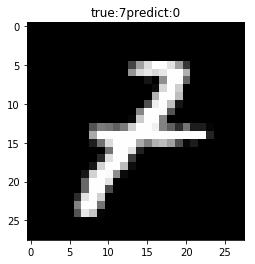

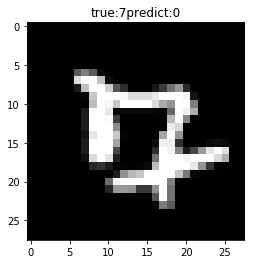

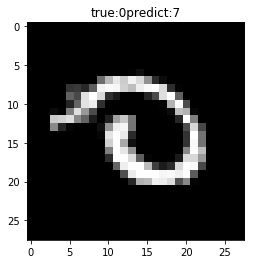

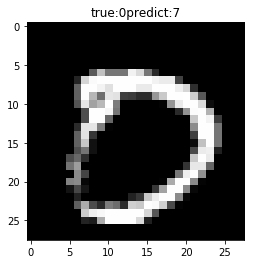

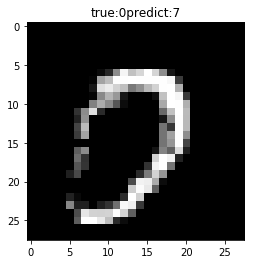

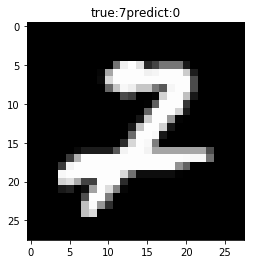

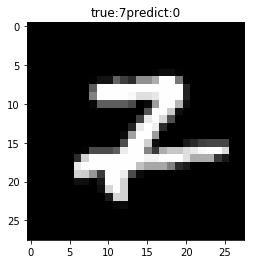

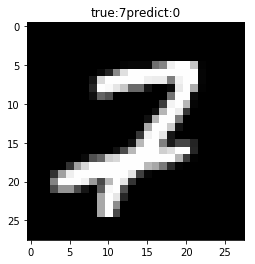

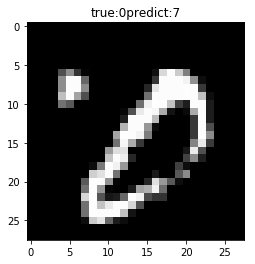

iteration: 1 true: 1999
iteration: 1 false: 9
iteration: 1 rate: 0.995517928287
iteration: 2 true: 1994
iteration: 2 false: 14
iteration: 2 rate: 0.993027888446
iteration: 3 true: 1995
iteration: 3 false: 13
iteration: 3 rate: 0.993525896414
iteration: 4 true: 1983
iteration: 4 false: 25
iteration: 4 rate: 0.987549800797
iteration: 5 true: 1992
iteration: 5 false: 16
iteration: 5 rate: 0.99203187251
iteration: 6 true: 1991
iteration: 6 false: 17
iteration: 6 rate: 0.991533864542
iteration: 7 true: 1990
iteration: 7 false: 18
iteration: 7 rate: 0.991035856574
iteration: 8 true: 1995
iteration: 8 false: 13
iteration: 8 rate: 0.993525896414
iteration: 9 true: 1996
iteration: 9 false: 12
iteration: 9 rate: 0.994023904382
iteration: 10 true: 1993
iteration: 10 false: 15
iteration: 10 rate: 0.992529880478
iteration: 11 true: 1994
iteration: 11 false: 14
iteration: 11 rate: 0.993027888446
iteration: 12 true: 2000
iteration: 12 false: 8
iteration: 12 rate: 0.996015936255
iteration: 13 true: 20

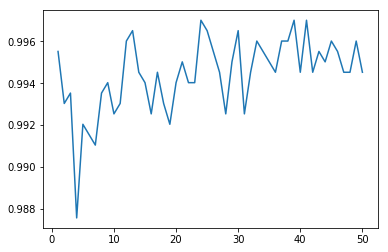

In [2]:
import numpy as np
import struct
import matplotlib.pyplot as plt

def show(num,true,predict):
    filename = 'E:/python/mnist/t10k-images.idx3-ubyte'
    binfile = open(filename, 'rb')
    buf = binfile.read()

    index = 784*num
    magic, numImages, numRows, numColumns = struct.unpack_from('>IIII', buf, index)
    index += struct.calcsize('>IIII')

    im = struct.unpack_from('>784B', buf, index)
    index += struct.calcsize('>784B')

    im = np.array(im)
    im = im.reshape(28, 28)

    fig = plt.figure()
    plotwindow = fig.add_subplot(111)
    plt.imshow(im, cmap='gray')
    plt.title("true:"+str(true)+"predict:"+str(predict))
    plt.show()

def loadImageSet(filename):
    print "load image set", filename
    binfile = open(filename, 'rb')
    buffers = binfile.read()

    head = struct.unpack_from('>IIII', buffers, 0)
    print "head,", head

    offset = struct.calcsize('>IIII')
    imgNum = head[1]
    width = head[2]
    height = head[3]
    # [60000]*28*28
    bits = imgNum * width * height
    bitsString = '>' + str(bits) + 'B'  # like '>47040000B'

    imgs = struct.unpack_from(bitsString, buffers, offset)

    binfile.close()
    imgs = np.reshape(imgs, [imgNum, 1, width * height])
    print "load imgs finished"
    return imgs


def loadLabelSet(filename):
    print "load label set", filename
    binfile = open(filename, 'rb')
    buffers = binfile.read()

    head = struct.unpack_from('>II', buffers, 0)
    print "head,", head
    imgNum = head[1]

    offset = struct.calcsize('>II')
    numString = '>' + str(imgNum) + "B"
    labels = struct.unpack_from(numString, buffers, offset)
    binfile.close()
    labels = np.reshape(labels, [imgNum, 1])

    print 'load label finished'
    return labels


class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=1):
        self.eta = eta
        self.n_iter = n_iter
        self.b = 0
        w1 = np.zeros(784)
        self.w = np.resize(w1,(1,784))
    def fit(self, X, y):
        if y == -1:
            if (np.dot(self.w,np.transpose(X))+self.b)>= 0:
                self.w += X*self.eta*y
                self.b += self.eta*y
        elif y == 1:
            if (np.dot(self.w,np.transpose(X))+self.b)<= 0:
                self.w += X*self.eta*y
                self.b += self.eta*y
        return self

    def predict(self, xi):
        if np.dot(self.w,np.transpose(xi))+self.b >= 0:
            return 1
        else:
            return -1


if __name__ == "__main__":
    train_img = loadImageSet("E:/python/mnist/train-images.idx3-ubyte")
    train_labels = loadLabelSet("E:/python/mnist/train-labels.idx1-ubyte")
    test_img = loadImageSet("E:/python/mnist/t10k-images.idx3-ubyte")
    test_labels = loadLabelSet("E:/python/mnist/t10k-labels.idx1-ubyte")
    ppn=Perceptron(eta=0.001,n_iter=1)
    checkrate = [0]*50
    show_x=np.linspace(1,50)
    for it in range(0,50):
        for j in range(0,60000):
            if train_labels[j] == 0:
                ppn.fit(X=train_img[j],y=-1)
            elif train_labels[j] == 7:
                ppn.fit(X=train_img[j], y=1)
        true = 0
        false = 0
        for i in range(0,10000):
            if test_labels[i] == 0 or test_labels[i] == 7:
                if test_labels[i] == 0 and ppn.predict(xi=test_img[i]) == -1:
                    true += 1
                if test_labels[i] == 7 and ppn.predict(xi=test_img[i]) == 1:
                    true += 1
                if test_labels[i] == 7 and ppn.predict(xi=test_img[i]) == -1:
                    false += 1
                    if it == 0:
                        show(i,7,0)
                if test_labels[i] == 0 and ppn.predict(xi=test_img[i]) == 1:
                    false += 1
                    if it == 0:
                        show(i,0,7)
        rate = (float)(true) / (true + false)
        checkrate[it] = rate;
        print "iteration:",it+1,"true:",true
        print "iteration:",it+1,"false:",false
        print "iteration:",it+1,"rate:",rate
    plt.plot(show_x, checkrate)
    plt.show()